# Cleaning data from transfermarkt

## We are cleaning the data of 25 leagues across the globe and assesing nearly a million transfer. We just want to see if clubs are paying more for younger players.

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [5]:
%%R -i df

UsageError: %%R is a cell magic, but the cell body is empty. Did you mean the line magic %R (single %)?


Merging all the dataframes into one big DF. 

In [22]:
bundesliga_df = pd.read_csv('data/1-bundesliga.csv')
championship_df = pd.read_csv('data/championship.csv')
laliga_df = pd.read_csv('data/primera-division.csv')
ligue1_df = pd.read_csv('data/ligue-1.csv')
seriea_df = pd.read_csv('data/serie-a.csv')
liganos_df = pd.read_csv('data/liga-nos.csv')
eredivisie_df = pd.read_csv('data/eredivisie.csv')
russian_league_df = pd.read_csv('data/premier-liga.csv')
prem_df = pd.read_csv('data/premier-league.csv')
brazil_df = pd.read_csv('data/campeonato-brasileiro-serie-a.csv')
china_df = pd.read_csv('data/chinese-super-league.csv')
japan_df = pd.read_csv('data/j1-league.csv')
sweden_df = pd.read_csv('data/allsvenskan.csv')
turkey_df = pd.read_csv('data/super-lig.csv')
usa_df = pd.read_csv('data/major-league-soccer.csv')
mexico_df = pd.read_csv('data/liga-mx-apertura.csv')
saudi_df = pd.read_csv('data/saudi-professional-league.csv')
scot_df = pd.read_csv('data/scottish-premiership.csv')
norway_df = pd.read_csv('data/eliteserien.csv')
austria_df = pd.read_csv('data/bundesliga.csv')
belgium_df = pd.read_csv('data/juliper-pro-league.csv')
korean_df = pd.read_csv('data/k-league-1.csv')
denmark_df = pd.read_csv('data/superligaen.csv')
argentina_df = pd.read_csv('data/superliga.csv')

In [23]:
leagues_df = pd.concat([argentina_df, denmark_df, korean_df, belgium_df, austria_df, norway_df, scot_df, mexico_df, saudi_df, sweden_df, usa_df, turkey_df, china_df, japan_df, prem_df, bundesliga_df, brazil_df, championship_df, laliga_df, ligue1_df, seriea_df, liganos_df, eredivisie_df, russian_league_df], ignore_index=True)
leagues_df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country
0,Club Atlético Aldosivi,César Carranza,33.0,Centre-Forward,Club Ferro Carril Oeste,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
1,Club Atlético Aldosivi,Gonzalo Bozzoni,24.0,Left-Back,Club Atlético Atlanta,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
2,Club Atlético Aldosivi,Matías Lequi,33.0,Centre-Back,Sportivo Luqueño,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
3,Club Atlético Aldosivi,Alejandro Capurro,33.0,Central Midfield,Club de Gimnasia y Esgrima La Plata,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
4,Club Atlético Aldosivi,Darío Gandín,30.0,Centre-Forward,CA Colon,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina


In [24]:
#save leagues_df into a master csv file
leagues_df.to_csv('master.csv', index=False)

In [25]:
df_in = leagues_df[leagues_df['transfer_movement'] == 'in']
df_in.head()


,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country
0,Club Atlético Aldosivi,César Carranza,33.0,Centre-Forward,Club Ferro Carril Oeste,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
1,Club Atlético Aldosivi,Gonzalo Bozzoni,24.0,Left-Back,Club Atlético Atlanta,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
2,Club Atlético Aldosivi,Matías Lequi,33.0,Centre-Back,Sportivo Luqueño,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
3,Club Atlético Aldosivi,Alejandro Capurro,33.0,Central Midfield,Club de Gimnasia y Esgrima La Plata,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina
4,Club Atlético Aldosivi,Darío Gandín,30.0,Centre-Forward,CA Colon,free transfer,in,Summer,0.0,Superliga,2014,2014/2015,Argentina


In [26]:
len(df_in)

189118

In [27]:
#filter df_in to year post 2015
df_in = df_in[df_in['year'] > 2015]

In [28]:
#save df_in to csv
df_in.to_csv('data.csv', index=False)

# Cleanup

In [29]:
#remove where fee is free transfer
df_in = df_in[df_in['fee'] != 'free transfer']
#remove where club_involved_name is Retired
df_in = df_in[df_in['club_involved_name'] != 'Retired']
#remove where club_involved_name is Without Club
df_in = df_in[df_in['club_involved_name'] != 'Without Club']
#remove where club_involved_name is Career Break
df_in = df_in[df_in['club_involved_name'] != 'Career break']
#remove with ages below 15
df_in = df_in[df_in['age'] > 15]
#remove where fee is loan transfer
df_in = df_in[df_in['fee'] != 'loan transfer']
#remove where fee_cleaned is Nan
df_in = df_in[df_in['fee_cleaned'].notnull()]

In [30]:
#show me players with highest age
df_in.sort_values(by=['age'], ascending=True).head(30)


,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country
46844,Club Brugge KV,Antonio Nusa,16.0,Left Winger,Stabæk Fotball,€3.00m,in,Summer,3.000,Juliper Pro League,2021,2021/2022,Belgium
299030,AS Monaco,Willem Geubbels,16.0,Left Winger,Olympique Lyon,€20.00m,in,Summer,20.000,Ligue 1,2018,2018/2019,France
210356,Borussia Dortmund,Julien Duranville,16.0,Right Winger,RSC Anderlecht,€8.50m,in,Winter,8.500,1 Bundesliga,2022,2022/2023,Germany
298705,AS Monaco,Pietro Pellegri,16.0,Centre-Forward,Genoa CFC,€20.90m,in,Winter,20.900,Ligue 1,2017,2017/2018,France
209345,Bayer 04 Leverkusen,Zidan Sertdemir,16.0,Central Midfield,FC Nordsjaelland U19,€2.50m,in,Summer,2.500,1 Bundesliga,2021,2021/2022,Germany
127251,Colorado Rapids,Dantouma Toure,16.0,Right Winger,New York Red Bulls Academy,€45k,in,Winter,0.045,Major League Soccer,2020,2020/2021,United States of America
281885,FC Barcelona,Pedri,16.0,Central Midfield,UD Las Palmas,€17.50m,in,Summer,17.500,Primera Division,2019,2019/2020,Spain
55196,Red Bull Salzburg,Karim Adeyemi,16.0,Left Winger,SpVgg Unterhaching U19,€10.10m,in,Summer,10.100,Bundesliga,2018,2018/2019,Austria
56278,LASK,Adam Griger,16.0,Centre-Forward,Zemplin Michalovce,€175k,in,Winter,0.175,Bundesliga,2020,2020/2021,Austria
382412,Krylya Sovetov Samara,Sergey Pinyaev,16.0,Left Winger,Chertanovo Moscow,€500k,in,Summer,0.500,Premier Liga,2021,2021/2022,Russia


In [31]:
len(df_in)

10023

In [32]:
#keep only these leagues: Serie A, La Liga, Premier League, 1 Bundesliga, Ligue 1
df_in = df_in[df_in['league_name'].isin(['Serie A', 'La Liga', 'Premier League', '1. Bundesliga', 'Ligue 1'])]
df_in = df_in[df_in['fee_cleaned']<100]

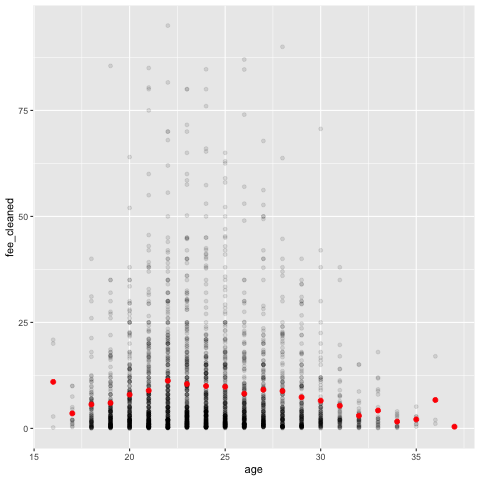

In [37]:
%%R -i df_in

ggplot(df_in, aes(x=age, y=fee_cleaned)) +
  geom_point(alpha=0.1) +
  stat_summary(aes(group = age), fun.y = "mean", geom = "point", color = "red", size = 2, show.legend = FALSE)

In [15]:
len(df_in)
#save this df_in to csv
df_in.to_csv('data.csv', index=False)


In [16]:
len(df_in)

2805